# Decision tree

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier as DTC
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run data.py

# Only py3 / so that 2 / 3 = 0.66..
from __future__ import division
# Only py3 string encoding
from __future__ import unicode_literals
# Only py3 print
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.utils import check_random_state


def plot_boundary(fitted_estimator, X, y, fname="boundary",
                  mesh_step_size=0.1, title=""):
    """Plot estimator decision boundary and scatter points

    Parameters
    ----------
    fitted_estimator : a fitted estimator

    X : array, shape (n_samples, 2)
        Input matrix

    y : array, shape (n_samples, )
        Binary classification target

    fname : str, optional (default='boundary')
        File name where the figures is saved.

    mesh_step_size : float, optional (default=0.2)
        Mesh size of the decision boundary

    title : str, optional (default="")
        Title of the graph

    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.figure(figsize=(14,10))
    plt.title(title)
    plt.xlabel("X_0")
    plt.ylabel("X_1")

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(fitted_estimator, "decision_function"):
        Z = fitted_estimator.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = fitted_estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, 20, cmap=cm, alpha=.8)
    plt.colorbar()

    # Plot testing point
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()
    #plt.savefig("%s.pdf" % fname)
    plt.close()



In [3]:
def make_cross(n_samples=500, noise_std=0.2, random_state=None, shift=0):
    """ Generate a binary classification task with crossing classes

    Parameters
    ----------
    n_samples : int, optional (default=500)
        Number of samples of the dataset

    noise_std : float, optional (default=0.2)
        A Gaussian noise with zero mean and noise_std standard deviation
        is added to the features

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The input samples.

    y : array of shape [n_samples]
        The output values.

    """
    random_state = check_random_state(random_state)

    y = random_state.randint(0, 2, size=n_samples)

    mask_neg = y == 0
    mask_pos = y == 1

    X = np.zeros((n_samples, 2))
    X[:, 0] = np.pi / 2 * random_state.rand(n_samples)
    X[mask_neg, 1] = np.sin(X[mask_neg, 0]) ** 2
    X[mask_pos, 1] = shift + np.cos(X[mask_pos, 0]) ** 2

    X += random_state.normal(loc=0., scale=noise_std, size=X.shape)

    return X, y

In [4]:
X_train, y_train = make_cross(n_samples=150, noise_std=0.4, shift=3)

In [5]:
X_test, y_test = make_cross(n_samples=1500, noise_std=0.4, shift=3)

In [6]:
knc = KNC(n_neighbors=5)
knc.fit(X_train, y_train)
Z = plot_boundary(knc, X_test, y_test)

NameError: name 'KNC' is not defined

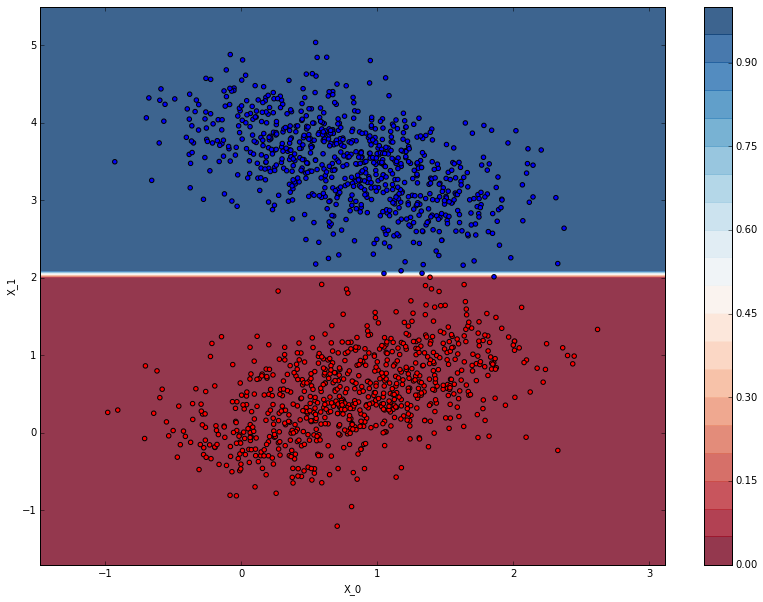

In [8]:
dtc = DTC(max_depth=None)
dtc.fit(X_train, y_train)
score = dtc.score(X_test, y_test)
pred = dtc.predict(X_test)
N = y_test.shape[0]
MSE = np.sum((pred - y_test)**2) / N # mean squared error
# print "MSE = {:1.3f} | Score = {:1.3f}".format(MSE,score)
plot_boundary(dtc, X_test, y_test)

### Testing different max depths

Max depth = 2 | MSE = 0.485 | Score = 0.515


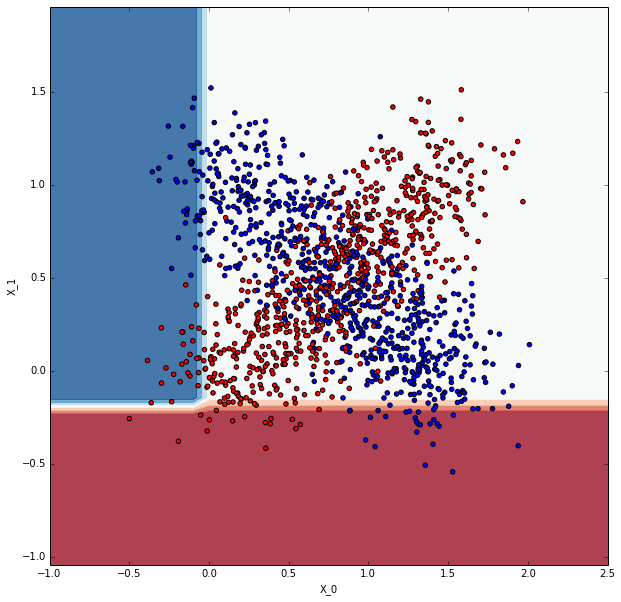

Max depth = 4 | MSE = 0.356 | Score = 0.644


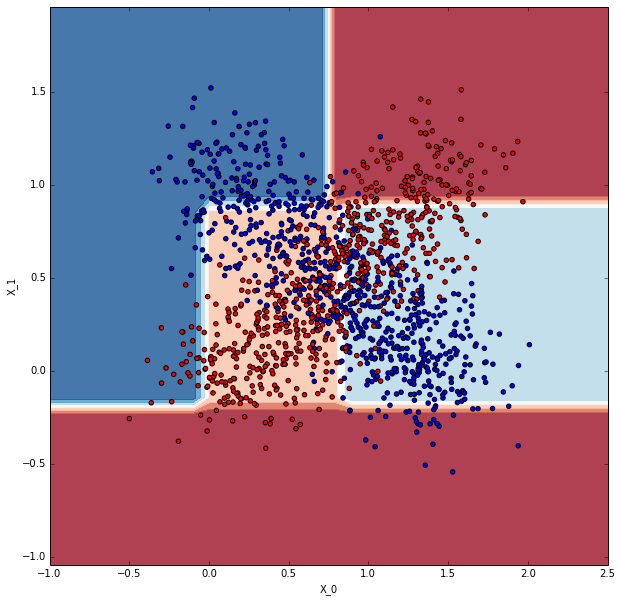

Max depth = 6 | MSE = 0.208 | Score = 0.792


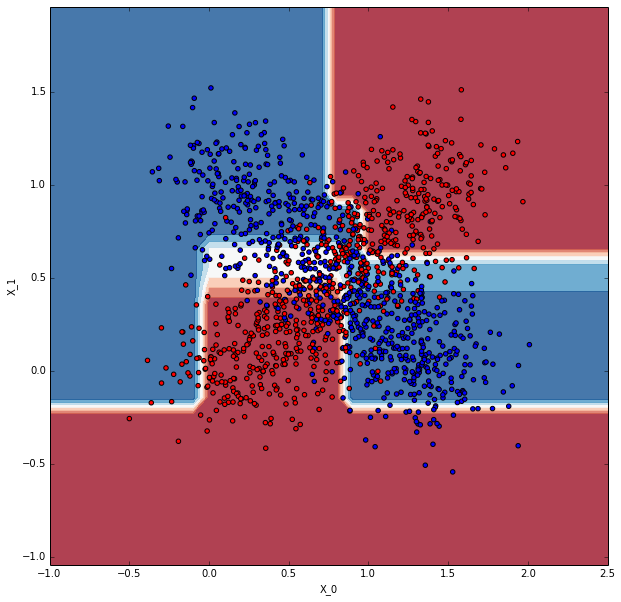

Max depth = 8 | MSE = 0.230 | Score = 0.770


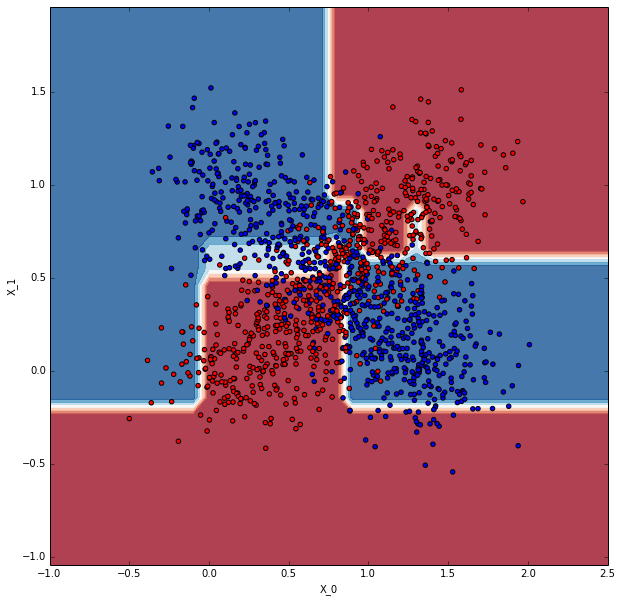

Max depth = 10 | MSE = 0.231 | Score = 0.769


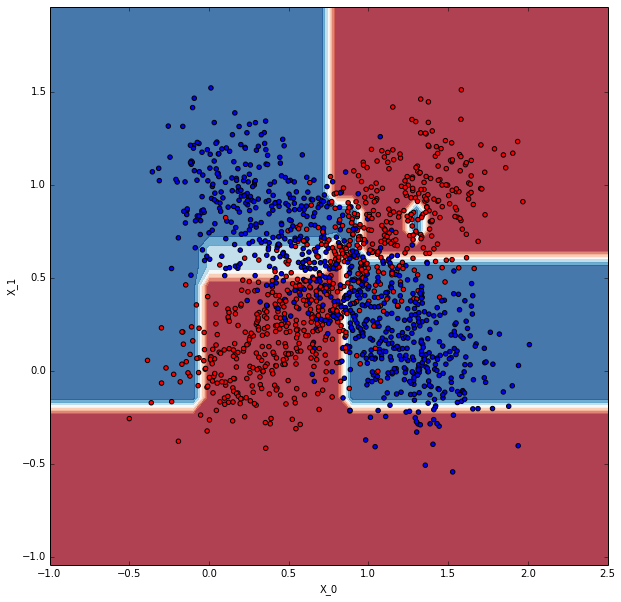

Max depth = 12 | MSE = 0.235 | Score = 0.765


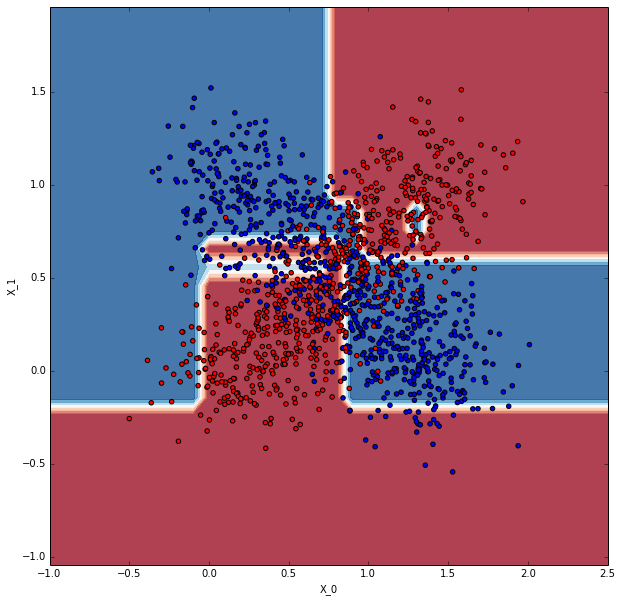

Max depth = 16 | MSE = 0.243 | Score = 0.757


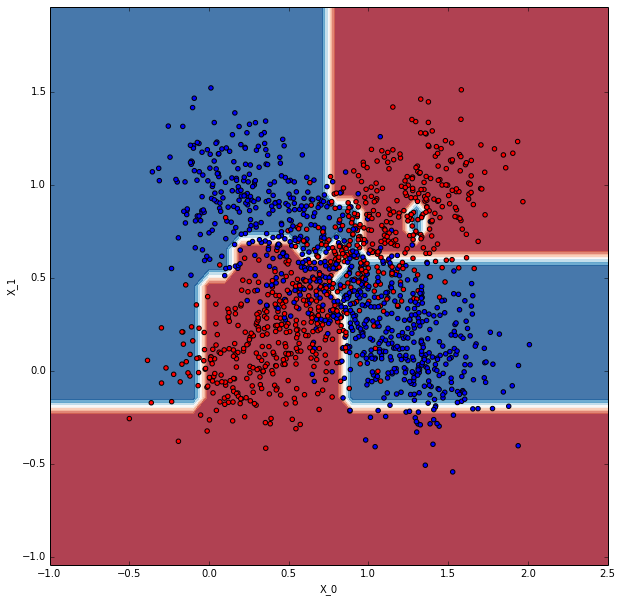

Max depth = 32 | MSE = 0.243 | Score = 0.757


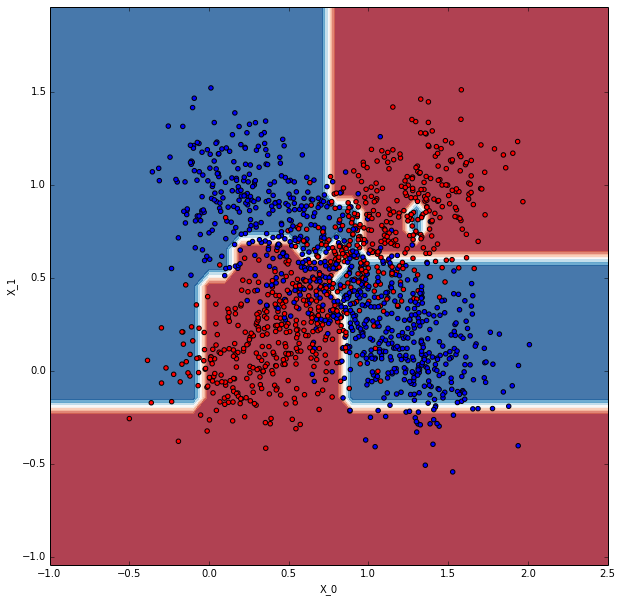

In [7]:
depths = [2, 4, 6, 8, 10, 12, 16, 32]
MSEList = []
scoreList = []
for maxd in depths:
    dtc = DTC(max_depth=maxd)
    dtc.fit(X_train, y_train)
    score = dtc.score(X_test, y_test)
    pred = dtc.predict(X_test)
    N = y_test.shape[0]
    MSE = np.sum((pred - y_test)**2) / N # mean squared error
    print "Max depth = {} | MSE = {:1.3f} | Score = {:1.3f}".format(maxd,MSE,score)
    MSEList.append(MSE)
    scoreList.append(score)
    plot_boundary(dtc, X_test, y_test)

#### Plotting the MSE and score (1-MSE)

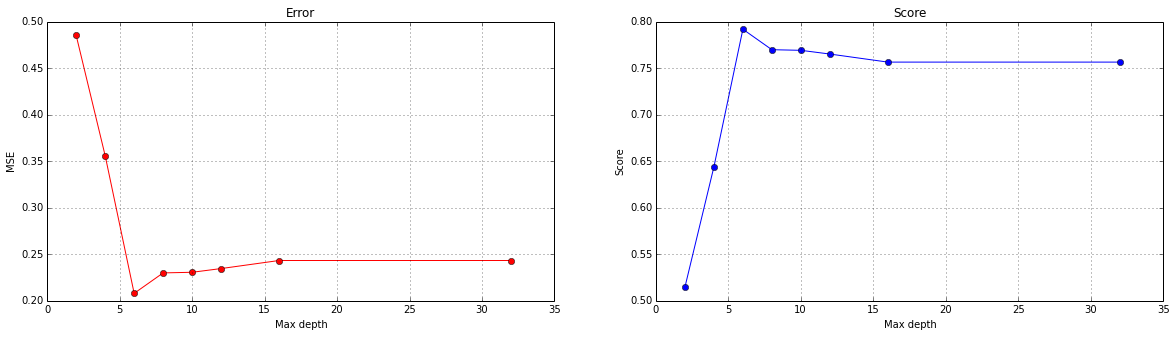

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.plot(np.array(depths), np.array(MSEList), '-o', color='r')
ax1.set_title('Error')
ax1.set_xlabel('Max depth')
ax1.set_ylabel('MSE')
ax1.grid()
ax2.plot(np.array(depths), np.array(scoreList), '-o')
ax2.set_title('Score')
ax2.set_xlabel('Max depth')
ax2.set_ylabel('Score')
ax2.grid()

### Generating n_exp experiments 

In [10]:
depths_exp = range(2,41)
n_exp = 100
bigMSE = np.zeros((n_exp, len(depths_exp)))
bigSCO = np.zeros((n_exp, len(depths_exp)))

for i in range(n_exp):
    MSELista = []
    scoreLista = []
    X_tr, y_tr = make_cross(n_samples=150)
    X_te, y_te = make_cross(n_samples=1500)
    for maxd in depths_exp:
        dtc = DTC(max_depth=maxd)
        dtc.fit(X_tr, y_tr)
        score = dtc.score(X_te, y_te)
        pred = dtc.predict(X_te)
        N = y_te.shape[0]
        MSE = np.sum((pred - y_te)**2) / N # mean squared error
        MSELista.append(MSE)
        scoreLista.append(score)
    bigMSE[i] = np.array(MSELista)
    bigSCO[i] = np.array(scoreLista)
    
aveMSE = bigMSE.mean(axis=0)
aveSCO = bigSCO.mean(axis=0)
# if np.any(where(aveMSE==aveMSE.min())[0] == where(aveSCO==aveSCO.max())[0]):
#     print "Best Max depth = ", depths_exp[int(where(aveMSE==aveMSE.min())[0])]

#### Plotting the averaged error

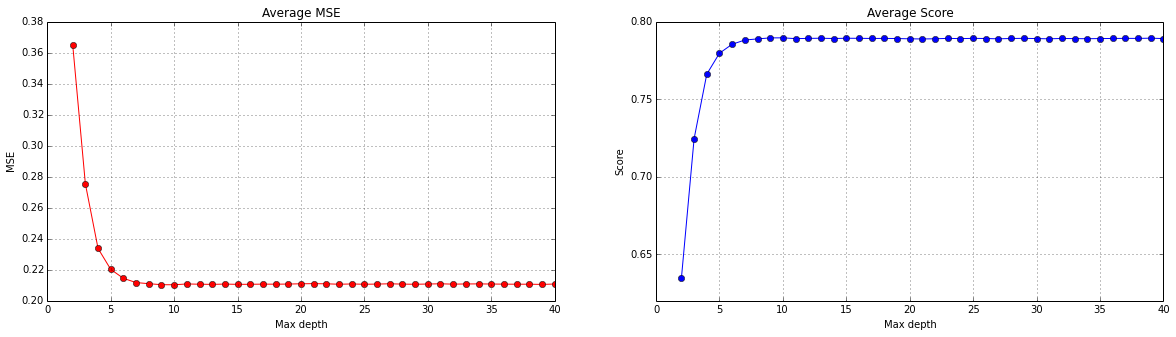

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.plot(depths_exp, aveMSE, '-o', color='r')
ax1.set_title('Average MSE')
ax1.set_xlabel('Max depth')
ax1.set_ylabel('MSE')
ax1.grid()
ax2.plot(depths_exp, aveSCO, '-o')
ax2.set_title('Average Score')
ax2.set_xlabel('Max depth')
ax2.set_ylabel('Score')
ax2.grid()

# K-nearest neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNC

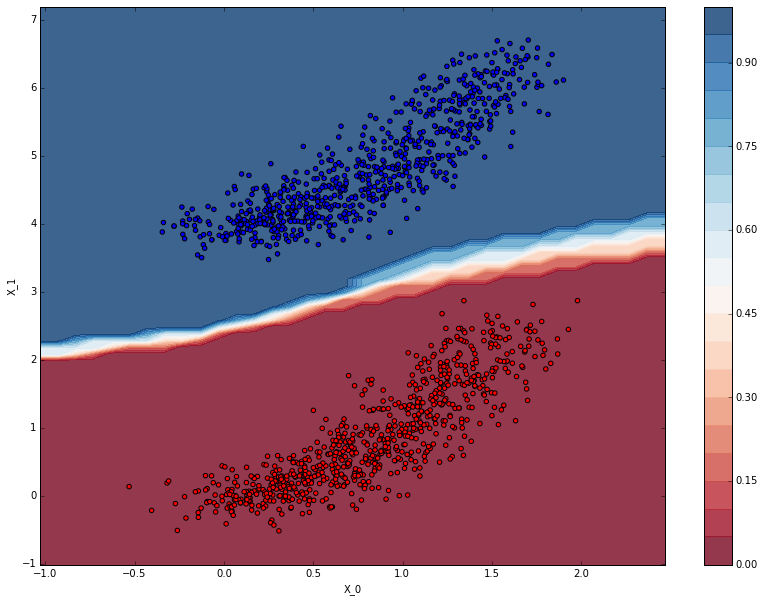

In [11]:
knc = KNC(n_neighbors=5)
knc.fit(X_train, y_train)
score_kn = knc.score(X_test, y_test)
pred_kn = knc.predict(X_test)
N = y_test.shape[0]
MSE_kn = np.sum((pred_kn - y_test)**2) / N    # mean squared error
#print "MSE = {:1.3f} | Score = {:1.3f}".format(MSE,score)
plot_boundary(knc, X_test, y_test)

#### Testing different n_neighbors

N neighbors = 2 | MSE = 0.217 | Score = 0.783


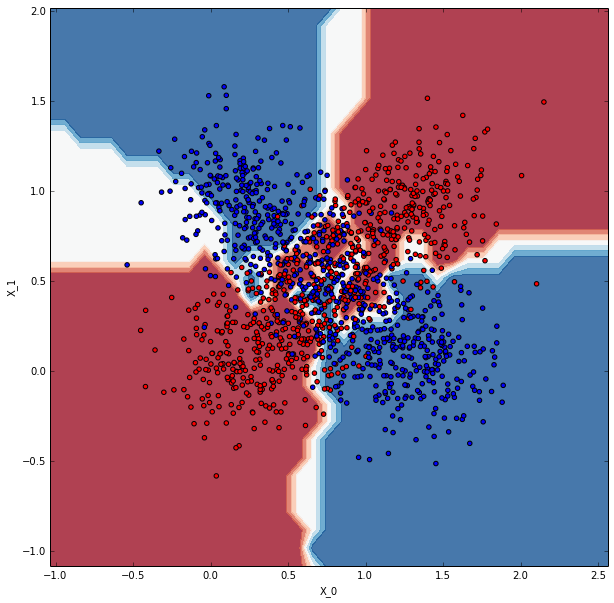

N neighbors = 3 | MSE = 0.185 | Score = 0.815


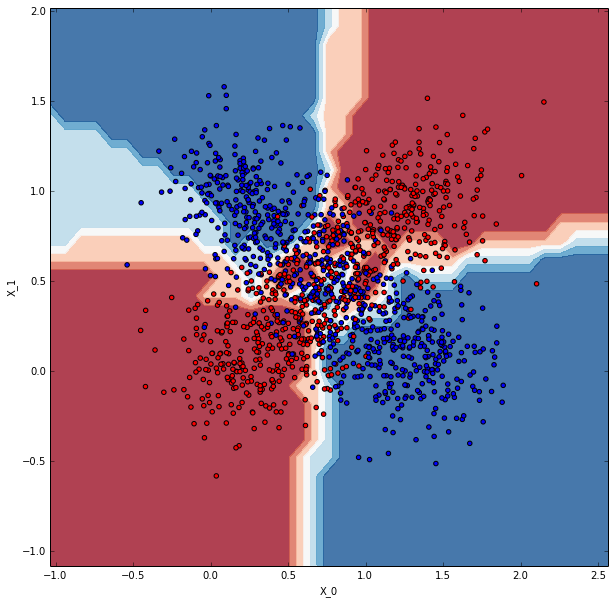

N neighbors = 4 | MSE = 0.184 | Score = 0.816


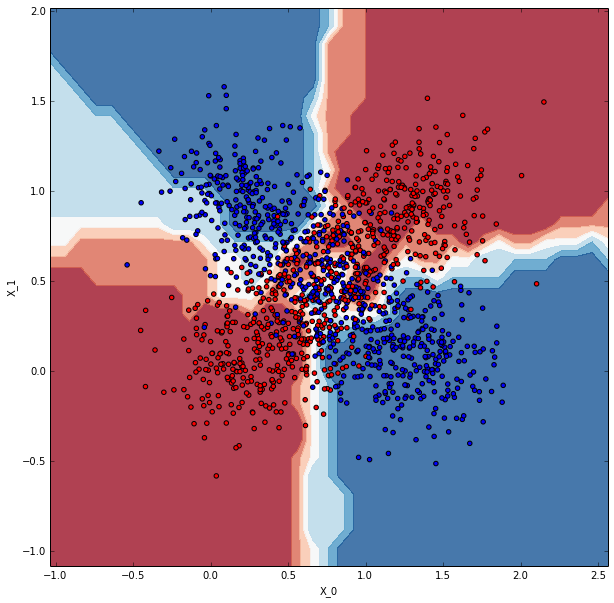

N neighbors = 5 | MSE = 0.186 | Score = 0.814


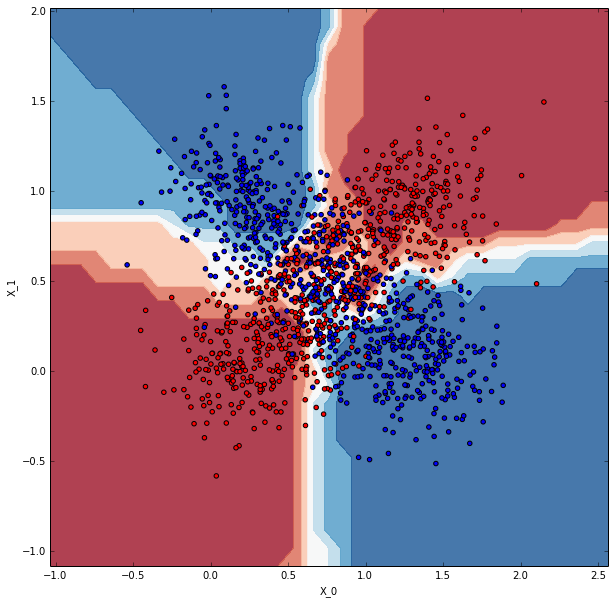

N neighbors = 10 | MSE = 0.193 | Score = 0.807


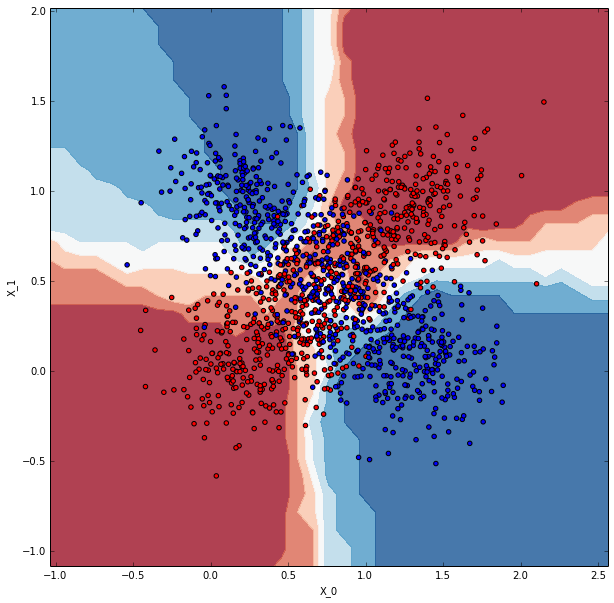

N neighbors = 15 | MSE = 0.198 | Score = 0.802


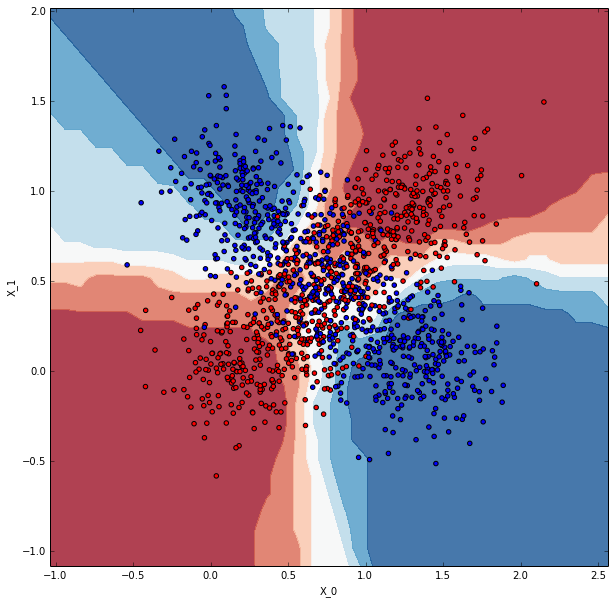

N neighbors = 20 | MSE = 0.196 | Score = 0.804


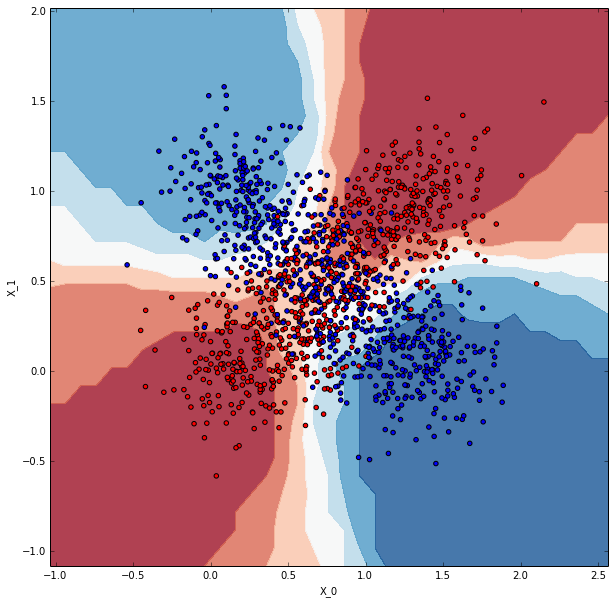

N neighbors = 30 | MSE = 0.197 | Score = 0.803


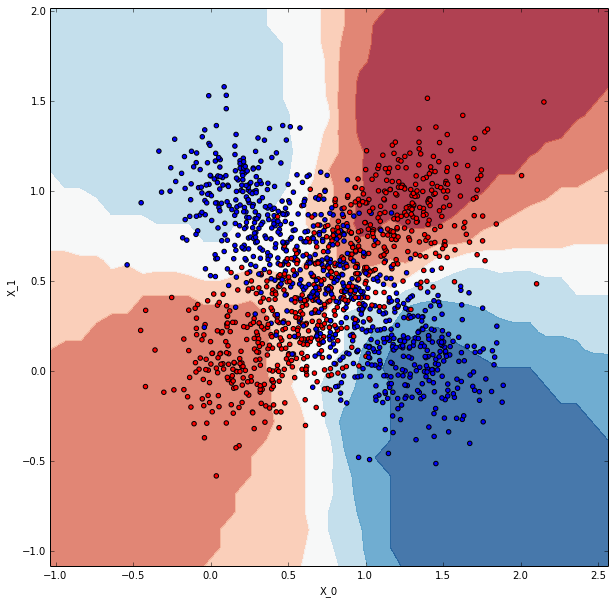

N neighbors = 40 | MSE = 0.216 | Score = 0.784


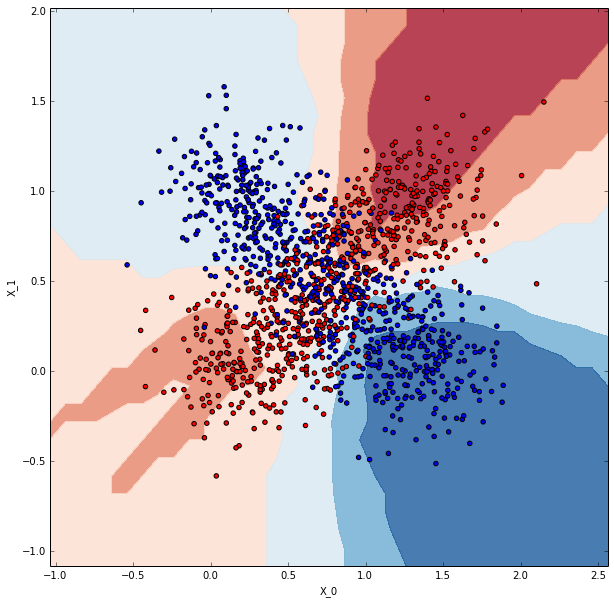

N neighbors = 50 | MSE = 0.290 | Score = 0.710


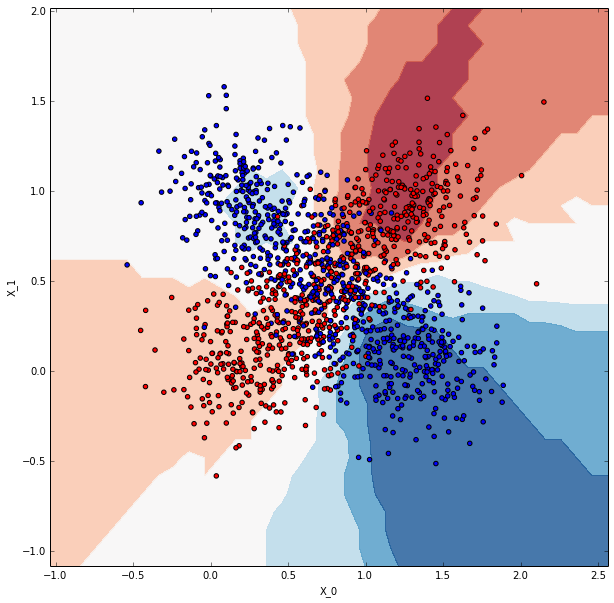

In [39]:
neighbors = [2, 3, 4, 5, 10, 15, 20, 30, 40, 50]
MSEList_kn = []
scoreList_kn = []
for neig in neighbors:
    knc = KNC(n_neighbors=neig)
    knc.fit(X_train, y_train)
    score_kn = knc.score(X_test, y_test)
    pred_kn = knc.predict(X_test)
    N = y_test.shape[0]
    MSE_kn = np.sum((pred_kn - y_test)**2) / N   # mean squared error
    print "N neighbors = {} | MSE = {:1.3f} | Score = {:1.3f}".format(neig,MSE_kn,score_kn)
    MSEList_kn.append(MSE_kn)
    scoreList_kn.append(score_kn)
    plot_boundary(knc, X_test, y_test)

#### Plotting the error

In [34]:
dtc.predict_proba(X_test)[:10]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

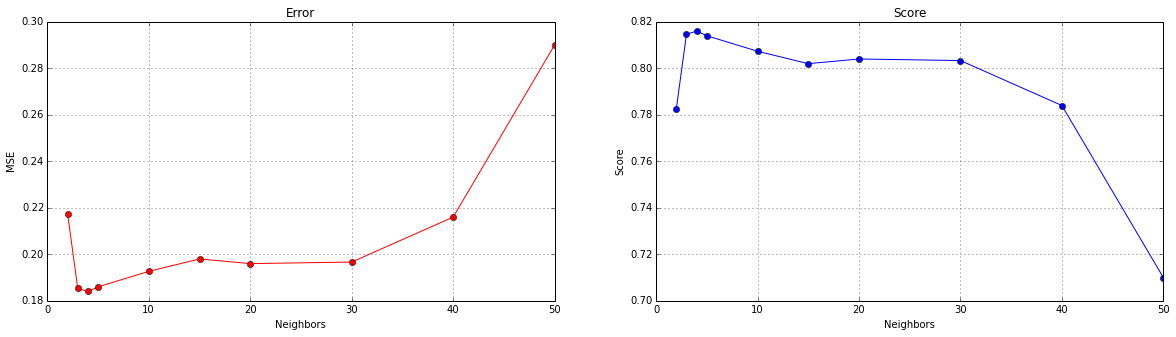

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.plot(np.array(neighbors), np.array(MSEList_kn), '-o', color='r')
ax1.set_title('Error')
ax1.set_xlabel('Neighbors')
ax1.set_ylabel('MSE')
ax1.grid()
ax2.plot(np.array(neighbors), np.array(scoreList_kn), '-o')
ax2.set_title('Score')
ax2.set_xlabel('Neighbors')
ax2.set_ylabel('Score')
ax2.grid()

#### Generating n_exp experiments

In [28]:
neigh_exp = range(2,61)
n_exp = 100
bigMSE_kn = np.zeros((n_exp, len(neigh_exp)))
bigSCO_kn = np.zeros((n_exp, len(neigh_exp)))

for i in range(n_exp):
    MSELista = []
    scoreLista = []
    X_tr, y_tr = make_cross(n_samples=150)
    X_te, y_te = make_cross(n_samples=1500)
    for neig in neigh_exp:
        knc = KNC(n_neighbors=neig)
        knc.fit(X_tr, y_tr)
        score = knc.score(X_te, y_te)
        pred = knc.predict(X_te)
        N = y_te.shape[0]
        MSE = np.sum((pred - y_te)**2) / N # mean squared error
        MSELista.append(MSE)
        scoreLista.append(score)
    bigMSE_kn[i] = np.array(MSELista)
    bigSCO_kn[i] = np.array(scoreLista)
    

#### Finding the best N_neighbors from the averaged experiments

In [29]:
aveMSE_kn = bigMSE_kn.mean(axis=0)
aveSCO_kn = bigSCO_kn.mean(axis=0)
if np.any(where(aveMSE_kn==aveMSE_kn.min())[0] == where(aveSCO_kn==aveSCO_kn.max())[0]):
    print "Best N neighbors =", neigh_exp[int(where(aveMSE_kn==aveMSE_kn.min())[0])], "| Best MSE =", aveMSE_kn.min()

Best N neighbors = 17 | Best MSE = 0.164126666667


#### Plotting the error

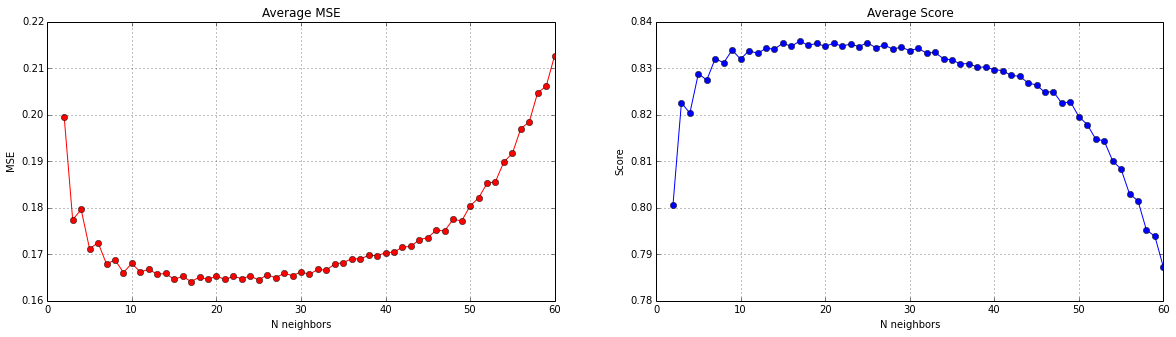

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.plot(neigh_exp, aveMSE_kn, '-o', color='r')
ax1.set_title('Average MSE')
ax1.set_xlabel('N neighbors')
ax1.set_ylabel('MSE')
ax1.grid()
ax2.plot(neigh_exp, aveSCO_kn, '-o')
ax2.set_title('Average Score')
ax2.set_xlabel('N neighbors')
ax2.set_ylabel('Score')
ax2.grid()

In [98]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

# Only py3 / so that 2 / 3 = 0.66..
from __future__ import division
# Only py3 string encoding
from __future__ import unicode_literals
# Only py3 print
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from data import make_cross
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

from sklearn.utils.validation import check_random_state

from plot import plot_boundary
import random

# (Question 3) sgd.py: Linear model through stochastic gradient descent


# Put your functions here
# ...


class SGDClassifier(BaseEstimator, ClassifierMixin):
    """Averaged stochastic gradient descent classifier

    Parameters
    ----------
    n_iter: int, optional (default=1000)
        The number of passes of sgd iterations.

    learning_rate_init : float, (default=0.01)
        Constant learning rate multiplier

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Attributes
    ----------
    coef_ : array, shape (n_features, )
        Estimated coefficients for the linear regression problem.

    intercept_ : float
        Independent/constant/bias term in the linear model.

    """
    def __init__(self, n_iter=1000, learning_rate_init=0.01, random_state=None):
        self.n_iter = n_iter
        self.learning_rate_init = learning_rate_init
        self.random_state = random_state

        # Fitted attribute
        self.coef_ = None
        self.intercept_ = 0.

    def fit(self, X, y):
        """Fit a linear model using the training set (X, y).

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            The training input samples.

        y : array-like, shape = [n_samples]
            The target values .

        Returns
        -------
        self : object
            Returns self.
        """
        # Use the given random_state for reproducibility
        random_state = check_random_state(self.random_state)

        # Input validation
        X = np.asarray(X, dtype=np.float)
        if X.ndim != 2:
            raise ValueError("X must be 2 dimensional")
        n_samples, n_features = X.shape

        # Normalize so to have integer classes
        self.classes_, y = np.unique(y, return_inverse=True)
        if len(self.classes_) > 2:
            # In the context of the project we will work only with binary
            # classification.
            raise NotImplementedError("Mutli-class classification is not "
                                      "implemented")
        if n_samples != y.shape[0]:
            raise ValueError("The number of samples differs between X and y")

        # Take into account the intercept
        # TODO Your code goes here

        X_1 = np.concatenate((np.ones((n_samples,1)),X),axis=1)

        # Fit a linear model using SGD
        # TODO Your code goes here

        #w = np.zeros((self.n_iter,n_features+1))
        w = np.zeros((1,n_features+1))
        t = 0

        while t < self.n_iter-1:
            rand_number = random.randint(0,n_samples-1)
            w = w - self.learning_rate_init*(w*X_1[rand_number,:].T - y[rand_number])*X_1[rand_number,:]
            #w[t+1,:] = w[t,:] - self.learning_rate_init*(w[t,:]*X_1[rand_number,:].T - y[rand_number])*X_1[rand_number,:]
            t = t + 1

        self.intercept_ = w[0,0]
        self.coef_ = w[0,1:3]
        print(self.intercept_)
        print(self.coef_)

        #self.intercept_ = np.mean(w[:,0])


        #self.coef_ = np.zeros(n_features)
        #v = 0
        #while v < n_features:
        #	self.coef_[v] = np.mean(w[:,v+1])
        #	v = v + 1


        # Store the coefficient of the model
        #self.coef_ = None # TODO set the weight of the estimator
        #self.intercept_ = None # TODO set the intercept of the estimator

        return self

    def predict(self, X):
        """Predict class for X.

        Parameters
        ----------
        X : array-like of shape = (n_samples, n_features)
            The input samples.

        Returns
        -------
        y : array of shape = (n_samples, )
            The predicted classes, or the predict values.
        """
        scores = self.decision_function(X)
        indices = (scores > 0).astype(np.int)
        return self.classes_[indices]


    def decision_function(self, X):
        """Predict confidence scores for samples.

        The confidence score for a sample is the signed distance of that
        sample to the hyperplane.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Samples.

        Returns
        -------
        score : array of shape = (n_samples, )
            Confidence score for self.classes_[1] where >0 means this
            class would be predicted.
        """
        X = np.asarray(X, dtype=np.float)

        if X.shape[1] != len(self.coef_):
            raise ValueError("X has %d features per sample; expecting %d"
                             % (X.shape[1], len(self.coef_)))

        # Predict using a linear model
        # TODO your code goes here

        n_samples, n_features = X.shape
        i = 0
        scores = np.zeros(n_samples)

        while i < n_samples:
            scores[i] = self.intercept_ + np.dot(self.coef_,X[i,:])
            if scores[i] > 0:
                scores[i] = 1
            elif scores[i] < 0:
                scores[i] = 0
            i = i + 1
        print(scores)
        #scores = None

        return scores.ravel()
    
if __name__ == "__main__":
    pass # Make your experiments here


0.552869284156
[ 0.42933062  0.21034627]
[ 1.  1.  1. ...,  1.  1.  1.]


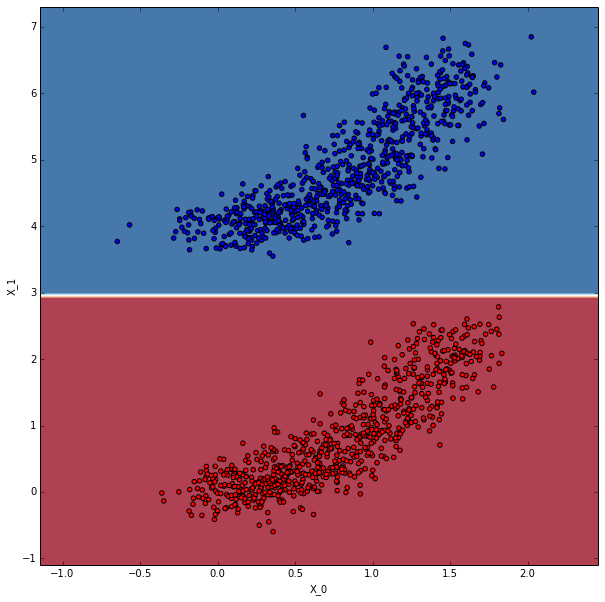

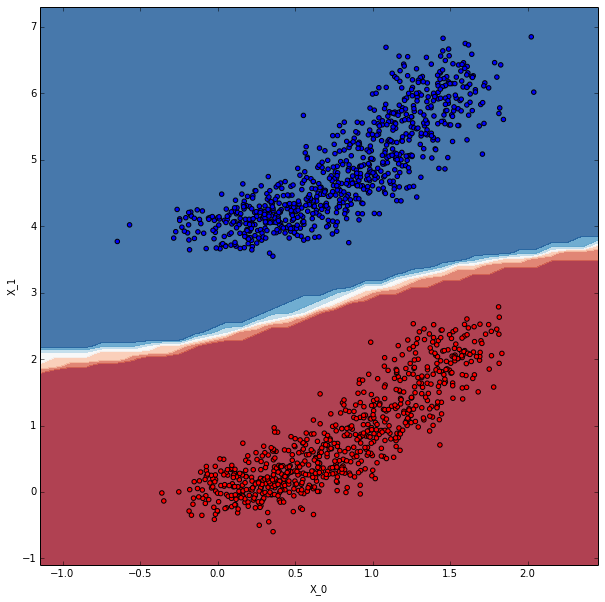

[ 0.  0.  0. ...,  1.  1.  1.]


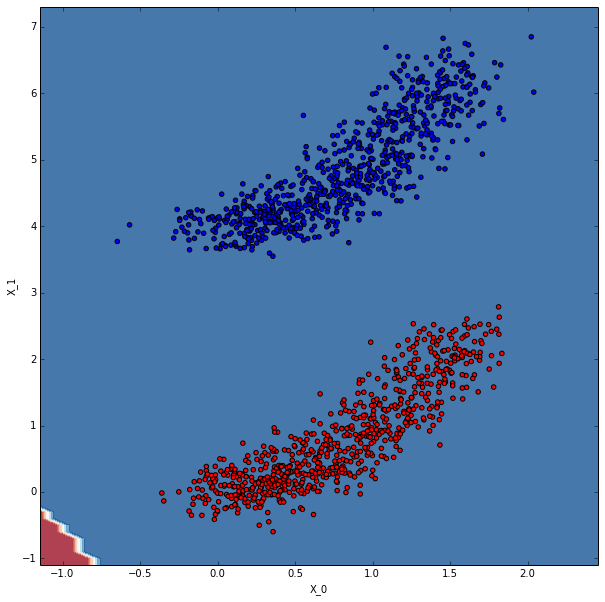

In [115]:
X_train, y_train = make_cross(150)
X_test, y_test = make_cross(1500)

dtc = DTC(max_depth=None)
dtc.fit(X_train, y_train)
score = dtc.score(X_test, y_test)
pred1 = dtc.predict(X_test)

knc = KNC(n_neighbors=5)
knc.fit(X_train, y_train)
score_kn = knc.score(X_test, y_test)
pred2 = knc.predict(X_test)

sgd = SGDClassifier(n_iter=10000,learning_rate_init=0.01)
sgd.fit(X_train, y_train)
pred3 = sgd.predict(X_test)

plot_boundary(dtc,X_test,y_test)
plot_boundary(knc,X_test,y_test)
plot_boundary(sgd,X_test,y_test)
